In [1]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
import numpy as np
import pickle
import random
from numpy.random import seed
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import pandas as pd
from secrets import randbelow

In [2]:
pickle_in = open("Xtrain96.pickle","rb")
Xtrain = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain = pickle.load(pickle_in)

Xtrain=np.array(Xtrain/255.0)
ytrain=np.array(ytrain)

pickle_in = open("Xval96.pickle","rb")
Xval = pickle.load(pickle_in)

pickle_in = open("yval96.pickle","rb")
yval = pickle.load(pickle_in)

pickle_in = open("XTest96.pickle","rb")
Xtest = pickle.load(pickle_in)

pickle_in = open("ytest96.pickle","rb")
ytest = pickle.load(pickle_in)

pickle_in = open("Xtrain96.pickle","rb")
Xtrain2 = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain2 = pickle.load(pickle_in)

# Genetic Algorithm

In [3]:
class GA():
    def __init__(self,popsize, iter_):
        self.popsize = popsize
        self.iter_ = iter_
        
    def popinit(self):
        population = [] 
        random.seed(0)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(self.popsize):
            inPop = [random.choice(fmap),random.choice(kernel),random.choice(learningRate),random.choice(dropout),random.choice(layer),random.choice(pool),random.choice(node)]
            population.append(inPop)
        return population

        
    def fitness(self,population,X,y):
        savefit=[]
        for i in range(len(population)):
            pop = population[i]
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(0)
            tf.random.set_seed(0)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

        return savefit
    
    def fitmutation(self,mut,X,y):
            pop = mut
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(0)
            tf.random.set_seed(0)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse
            return fitmut
        
    
    def parent_select(self,population, fitness):
        sumfit = np.sum(fitness)
        prob=[]
        parent_1=[]
        random.seed(0)
        for i in range(len(fitness)):
            tmp = fitness[i]/sumfit
            prob.append(tmp)
        prob_range = []
        sum_ = 0
        for i in range(len(prob)):
                sum_ += prob[i]
                prob_range.append(sum_)
        for i in range(len(prob)):
                rand = random.random()
                if rand <= prob_range[i]:
                    parent_1 = population[i]
                    break
        # select second parent
        parent_2 = parent_1
        while (parent_2 == parent_1):
                for i in range(len(prob)):
                    rand = random.random()
                    if rand <= prob_range[i]:
                        parent_2 = population[i]
                        break
        return parent_1, parent_2
    
    def cross_over(self,parent1, parent2):
        random.seed(0)
        crosspoint = random.randrange(0,6)
        child1 = parent1[:crosspoint+1] + parent2[crosspoint+1:]
        child2 = parent2[:crosspoint+1] + parent1[crosspoint+1:] 
        return child1, child2
    
    def mutation(self,child1, child2):
        import copy
        random.seed(0)
        tmp1 = copy.deepcopy(child1)
        tmp2 = copy.deepcopy(child2)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(len(tmp1)):    
            if (i == 0) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(fmap)
                    tmp2[point] = random.choice(fmap)
            elif (i ==1):
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(kernel)
                    tmp2[point] = random.choice(kernel)
            elif (i == 2) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(learningRate)
                    tmp2[point] = random.choice(learningRate)
            elif (i == 3) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(dropout)
                    tmp2[point] = random.choice(dropout)
            elif (i == 4) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(layer)
                    tmp2[point] = random.choice(layer)
            elif (i == 5) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(pool)
                    tmp2[point] = random.choice(pool)
            else :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(node)
                    tmp2[point] = random.choice(node)
        return tmp1, tmp2
       
    def sort(self, population, fitness):
        tmp_dict = {'population' : population,'fitness': fitness }
        df = pd.DataFrame(tmp_dict)
        df.sort_values('fitness', ascending=True, inplace=True)
        new_pop = df['population'].values.tolist()
        fit = df['fitness'].values.tolist()
        return new_pop, fit
    
    def newfit(self,mut1,mut2,listindividu,X,y) :
        tmpmut=[]
        tmpfit1=0.0
        tmpfit2=0.0
        tmpmut.append(mut1)
        tmpmut.append(mut2)
        for i in listindividu:
            if i[0] == mut1 :
                tmpfit1  = (i[1])
            if i[0] == mut2 :
                tmpfit2 = (i[1])
        if (tmpfit1)==0.0 and (tmpfit2)==0.0 :
            fitness = self.fitness(tmpmut,X,y)
            fit1 = fitness[0]
            fit2 = fitness[1]
        elif (tmpfit1)==0.0 :
            fit1 = self.fitmutation(mut1,X,y)
            fit2 = tmpfit2
        else :
            fit1= tmpfit1
            fit2 = self.fitmutation(mut2,X,y)
        return fit1,fit2
                        
    
    def fit(self,X,y):
        pop = self.popinit()
        fitness = self.fitness(pop,X,y)
        listindividu =[]
        for i in range(len(pop)):
            a = pop[i]
            b = fitness[i]
            temp=[a,b]
            listindividu.append(temp)
        print(pop)
        print(fitness)
        bestingen =[]
        index = np.argmin(fitness)
        popgen = pop[index]
        fitgen = fitness[index]
        bestingen.append('Generasi 0')
        bestingen.append(popgen)
        bestingen.append(fitgen)
        for i in range(self.iter_):
            print( 'Generasi Ke ' , i+1 )
            parent_1, parent_2 = self.parent_select(pop, fitness)
            print('Parent 1 dan 2 ', parent_1, parent_2)
            child_1, child_2 = self.cross_over(parent_1, parent_2)
            print('Child 1 dan 2', child_1, child_2 )
            mut1, mut2 = self.mutation(child_1, child_2)
            print('Mutasi 1 dan 2', mut1, mut2)
            pop, fitness = self.sort(pop,fitness)
            fitmut1,fitmut2 = self.newfit(mut1,mut2,listindividu,X,y)
            pop[-1] = mut1; pop[-2] = mut2
            fitness[-1] = fitmut1 ; fitness[-2] = fitmut2
            mutt=[]
            mutt.append(mut1)
            mutt.append(mut2)
            fitmut=[]
            fitmut.append(fitmut1)
            fitmut.append(fitmut2)
            update=[]
            for i in range(len(mutt)) :
                a = mutt[i]
                b = fitmut[i]
                temp=[a,b]
                update.append(temp)
            listindividu.extend(update)
            print(pop)
            print(fitness)
            index = np.argmin(fitness)
            popgen = pop[index]
            fitgen = fitness[index]
            bestingen.append(popgen)
            bestingen.append(fitgen)
        idx_ = np.argmin(fitness)
        best_pop = pop[idx_]
        return  best_pop,bestingen

In [4]:
featSelection = GA( popsize=10, iter_=20)

In [5]:
feat,besteverygen = featSelection.fit(Xtrain,ytrain)

Epoch 1/10
66/66 [==============================] - 272s 120ms/step - loss: 0.6934 - accuracy: 0.4928 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 4s 58ms/step - loss: 0.6914 - accuracy: 0.5329 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6931 - accuracy: 0.4849 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6937 - accuracy: 0.4735 - val_loss: 0.6925 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6924 - accuracy: 0.4960 - val_loss: 0.6923 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6911 - accuracy: 0.5392 - val_loss: 0.6916 - val_accuracy: 0.5101
Epoch 7/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6926 - accuracy: 0.4897 - val_loss: 0.6886 - val_accuracy: 0.5884
Epoch 8/10

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 42ms/step - loss: 0.7707 - accuracy: 0.5217 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6935 - accuracy: 0.5329 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6933 - accuracy: 0.4931 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6938 - accuracy: 0.4638 - val_loss: 0.6927 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 17ms/step - loss: 0.7240 - accuracy: 0.5030 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6939 - accuracy: 0.4942 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 6s 50ms/step - loss: 0.6944 - accuracy: 0.5044 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5329 - val_loss: 0.6928 - val_accuracy: 0.5996
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5344 - val_loss: 0.6907 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 8ms/step - loss: 0.6576 - accuracy: 0.6005 - val_loss: 0.5752 - val_accuracy: 0.7002
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5780 - accuracy: 0.7081 - val_loss: 0.3959 - val_accuracy: 0.8322
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4422 - accuracy: 0.7962 - val_loss: 0.3314 - val_accuracy: 0.8680
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.3141 - accuracy: 0.8974 - val_loss: 0.2109 - val_accuracy: 0.9239
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 6s 49ms/step - loss: 0.6937 - accuracy: 0.5107 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5331 - val_loss: 0.6899 - val_accuracy: 0.6823
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6848 - accuracy: 0.5807 - val_loss: 0.6658 - val_accuracy: 0.5481
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6461 - accuracy: 0.6187 - val_loss: 0.6067 - val_accuracy: 0.6756
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6164 - accuracy: 0.6734 - val_loss: 0.5510 - val_accuracy: 0.7226
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5419 - accuracy: 0.7312 - val_loss: 0.4350 - val_accuracy: 0.7897
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.3935 - accuracy: 0.8365 - val_loss: 0.2834 - val_accuracy: 0.8881
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 10s 98ms/step - loss: 0.7024 - accuracy: 0.5257 - val_loss: 0.6920 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6904 - accuracy: 0.5290 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6924 - accuracy: 0.5119 - val_loss: 0.6948 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6972 - accuracy: 0.4661 - val_loss: 0.6924 - val_accuracy: 0.5548
Epoch 5/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6921 - accuracy: 0.5530 - val_loss: 0.6832 - val_accuracy: 0.5324
Epoch 6/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6823 - accuracy: 0.5502 - val_loss: 0.6804 - val_accuracy: 0.6219
Epoch 7/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6771 - accuracy: 0.5982 - val_loss: 0.6767 - val_accuracy: 0.5570
Epoch 8/10
6

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5081 - val_loss: 0.6925 - val_accuracy: 0.5324
Epoch 2/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5316 - val_loss: 0.6910 - val_accuracy: 0.6801
Epoch 3/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.6392 - val_loss: 0.6891 - val_accuracy: 0.5257
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5390 - val_loss: 0.6838 - val_accuracy: 0.6667
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6825 - accuracy: 0.6319 - val_loss: 0.6740 - val_accuracy: 0.6622
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6702 - accuracy: 0.6419 - val_loss: 0.6608 - val_accuracy: 0.6801
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6586 - accuracy: 0.6582 - val_loss: 0.6399 - val_accuracy: 0.6868
Epoch 8/10
66/66 [==

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 33ms/step - loss: 0.7987 - accuracy: 0.4944 - val_loss: 0.6928 - val_accuracy: 0.6242
Epoch 2/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.5252 - val_loss: 0.6923 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6926 - accuracy: 0.5427 - val_loss: 0.6895 - val_accuracy: 0.5324
Epoch 4/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6621 - accuracy: 0.5609 - val_loss: 0.5159 - val_accuracy: 0.7562
Epoch 5/10
66/66 [==============================] - 1s 14ms/step - loss: 0.5120 - accuracy: 0.7821 - val_loss: 0.4512 - val_accuracy: 0.7942
Epoch 6/10
66/66 [==============================] - 1s 14ms/step - loss: 0.4183 - accuracy: 0.8069 - val_loss: 0.3638 - val_accuracy: 0.8702
Epoch 7/10
66/66 [==============================] - 1s 14ms/step - loss: 0.3543 - accuracy: 0.8604 - val_loss: 0.2784 - val_accuracy: 0.8993
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 28ms/step - loss: 1.6344 - accuracy: 0.5253 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6923 - accuracy: 0.5329 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6939 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6946 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4876 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 24ms/step - loss: 0.7014 - accuracy: 0.5509 - val_loss: 0.6910 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5364 - val_loss: 0.6910 - val_accuracy: 0.6622
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.5674 - val_loss: 0.6971 - val_accuracy: 0.5034
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6570 - accuracy: 0.6148 - val_loss: 0.5326 - val_accuracy: 0.7517
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5443 - accuracy: 0.7478 - val_loss: 0.4707 - val_accuracy: 0.7696
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4435 - accuracy: 0.7971 - val_loss: 0.3867 - val_accuracy: 0.8367
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.3873 - accuracy: 0.8344 - val_loss: 0.3313 - val_accuracy: 0.8702
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 38ms/step - loss: 0.6950 - accuracy: 0.4834 - val_loss: 0.6921 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6904 - accuracy: 0.5376 - val_loss: 0.6887 - val_accuracy: 0.5705
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6836 - accuracy: 0.5765 - val_loss: 0.6898 - val_accuracy: 0.5011
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6931 - accuracy: 0.5529 - val_loss: 0.6728 - val_accuracy: 0.5749
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6580 - accuracy: 0.6021 - val_loss: 0.6337 - val_accuracy: 0.6152
Epoch 6/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6572 - accuracy: 0.6382 - val_loss: 0.6128 - val_accuracy: 0.6286
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5781 - accuracy: 0.6945 - val_loss: 0.5443 - val_accuracy: 0.7450
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4964 - val_loss: 0.6925 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6885 - accuracy: 0.5449 - val_loss: 0.6846 - val_accuracy: 0.5749
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6721 - accuracy: 0.5893 - val_loss: 0.6644 - val_accuracy: 0.5459
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6733 - accuracy: 0.5759 - val_loss: 0.6174 - val_accuracy: 0.6779
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6066 - accuracy: 0.6702 - val_loss: 0.4400 - val_accuracy: 0.8054
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4658 - accuracy: 0.7697 - val_loss: 0.4071 - val_accuracy: 0.8277
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6379 - accuracy: 0.6412 - val_loss: 0.5969 - val_accuracy: 0.6465
Epoch 8/10
66/66 [=============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 5s 57ms/step - loss: 0.6946 - accuracy: 0.5073 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 45ms/step - loss: 0.6923 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 45ms/step - loss: 0.6935 - accuracy: 0.4848 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 45ms/step - loss: 0.6940 - accuracy: 0.4734 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 45ms/step - loss: 0.6937 - accuracy: 0.4947 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 3s 45ms/step - loss: 0.6935 - accuracy: 0.4914 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 3s 45ms/step - loss: 0.6935 - accuracy: 0.5021 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4962 - val_loss: 0.6927 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5349 - val_loss: 0.6837 - val_accuracy: 0.5705
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6701 - accuracy: 0.5933 - val_loss: 0.6677 - val_accuracy: 0.5369
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6740 - accuracy: 0.5713 - val_loss: 0.6280 - val_accuracy: 0.6644
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6221 - accuracy: 0.6501 - val_loss: 0.6394 - val_accuracy: 0.7047
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5538 - accuracy: 0.7321 - val_loss: 0.5259 - val_accuracy: 0.7293
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6614 - accuracy: 0.6443 - val_loss: 0.6084 - val_accuracy: 0.6465
Epoch 8/10
66/66 [=============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 4s 46ms/step - loss: 0.7024 - accuracy: 0.5262 - val_loss: 0.6918 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6901 - accuracy: 0.5284 - val_loss: 0.6830 - val_accuracy: 0.5123
Epoch 3/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6847 - accuracy: 0.5617 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6942 - accuracy: 0.4817 - val_loss: 0.6927 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6934 - accuracy: 0.4879 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6935 - accuracy: 0.4786 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6933 - accuracy: 0.4905 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 4s 47ms/step - loss: 0.7024 - accuracy: 0.5267 - val_loss: 0.6917 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 45ms/step - loss: 0.6917 - accuracy: 0.5205 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6929 - accuracy: 0.5285 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6946 - accuracy: 0.4921 - val_loss: 0.6907 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6911 - accuracy: 0.5421 - val_loss: 0.6949 - val_accuracy: 0.5011
Epoch 6/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6955 - accuracy: 0.5096 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 7/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6916 - val_accuracy: 0.5011
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 3s 45ms/step - loss: 0.7018 - accuracy: 0.5403 - val_loss: 0.6859 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6612 - accuracy: 0.6190 - val_loss: 0.6115 - val_accuracy: 0.7338
Epoch 3/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6087 - accuracy: 0.6858 - val_loss: 0.6309 - val_accuracy: 0.6152
Epoch 4/10
66/66 [==============================] - 3s 44ms/step - loss: 0.5472 - accuracy: 0.7415 - val_loss: 0.4768 - val_accuracy: 0.7830
Epoch 5/10
66/66 [==============================] - 3s 43ms/step - loss: 0.4715 - accuracy: 0.7867 - val_loss: 0.3939 - val_accuracy: 0.8188
Epoch 6/10
66/66 [==============================] - 3s 48ms/step - loss: 0.4100 - accuracy: 0.8038 - val_loss: 0.4000 - val_accuracy: 0.7987
Epoch 7/10
66/66 [==============================] - 3s 43ms/step - loss: 0.3749 - accuracy: 0.8389 - val_loss: 0.3426 - val_accuracy: 0.8613
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 26ms/step - loss: 0.7132 - accuracy: 0.4995 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6925 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6942 - accuracy: 0.4760 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6935 - accuracy: 0.4984 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6933 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 24ms/step - loss: 0.7132 - accuracy: 0.5012 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6924 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6940 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6944 - accuracy: 0.4760 - val_loss: 0.6937 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6943 - accuracy: 0.4741 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6933 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6933 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 4s 46ms/step - loss: 0.7003 - accuracy: 0.5458 - val_loss: 0.6741 - val_accuracy: 0.5347
Epoch 2/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6355 - accuracy: 0.6553 - val_loss: 0.5947 - val_accuracy: 0.8031
Epoch 3/10
66/66 [==============================] - 3s 44ms/step - loss: 0.5540 - accuracy: 0.7802 - val_loss: 0.5072 - val_accuracy: 0.7360
Epoch 4/10
66/66 [==============================] - 3s 43ms/step - loss: 0.4477 - accuracy: 0.8218 - val_loss: 0.3835 - val_accuracy: 0.8389
Epoch 5/10
66/66 [==============================] - 3s 44ms/step - loss: 0.3930 - accuracy: 0.8403 - val_loss: 0.3450 - val_accuracy: 0.8568
Epoch 6/10
66/66 [==============================] - 3s 44ms/step - loss: 0.3438 - accuracy: 0.8478 - val_loss: 0.3424 - val_accuracy: 0.8322
Epoch 7/10
66/66 [==============================] - 3s 44ms/step - loss: 0.2986 - accuracy: 0.8893 - val_loss: 0.2623 - val_accuracy: 0.9083
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 21ms/step - loss: 0.7710 - accuracy: 0.5267 - val_loss: 0.6912 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6914 - accuracy: 0.5400 - val_loss: 0.6859 - val_accuracy: 0.6488
Epoch 3/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6867 - accuracy: 0.5299 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6937 - accuracy: 0.4785 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6924 - accuracy: 0.5011 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6929 - accuracy: 0.5038 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6926 - accuracy: 0.5051 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 25ms/step - loss: 0.7729 - accuracy: 0.5240 - val_loss: 0.6922 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6904 - accuracy: 0.5367 - val_loss: 0.6923 - val_accuracy: 0.6040
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6987 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.7026 - accuracy: 0.4600 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6931 - accuracy: 0.4884 - val_loss: 0.6779 - val_accuracy: 0.6376
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6842 - accuracy: 0.5707 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6933 - accuracy: 0.5221 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 23ms/step - loss: 0.7708 - accuracy: 0.5271 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6919 - accuracy: 0.5498 - val_loss: 0.6820 - val_accuracy: 0.5034
Epoch 3/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6842 - accuracy: 0.5439 - val_loss: 0.6792 - val_accuracy: 0.5526
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6870 - accuracy: 0.5585 - val_loss: 0.6948 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6935 - accuracy: 0.4950 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6936 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6936 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 21ms/step - loss: 0.7710 - accuracy: 0.5263 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6943 - accuracy: 0.5373 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6936 - accuracy: 0.4843 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6941 - accuracy: 0.4760 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6933 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6934 - accuracy: 0.4763 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6918 - val_accuracy: 0.5324
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 22ms/step - loss: 0.7709 - accuracy: 0.5288 - val_loss: 0.6943 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6913 - accuracy: 0.5303 - val_loss: 0.6754 - val_accuracy: 0.5593
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6789 - accuracy: 0.5586 - val_loss: 1.0342 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.7194 - accuracy: 0.5747 - val_loss: 0.6288 - val_accuracy: 0.6398
Epoch 5/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6090 - accuracy: 0.6535 - val_loss: 0.5517 - val_accuracy: 0.7271
Epoch 6/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5590 - accuracy: 0.7096 - val_loss: 0.5559 - val_accuracy: 0.7114
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5541 - accuracy: 0.7136 - val_loss: 0.5056 - val_accuracy: 0.7696
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 21ms/step - loss: 0.7709 - accuracy: 0.5258 - val_loss: 0.6885 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6912 - accuracy: 0.5457 - val_loss: 0.6920 - val_accuracy: 0.49890.6907 - accu
Epoch 3/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6949 - accuracy: 0.4591 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6948 - accuracy: 0.4595 - val_loss: 0.6775 - val_accuracy: 0.5973
Epoch 5/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6810 - accuracy: 0.5909 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6937 - accuracy: 0.5014 - val_loss: 0.6720 - val_accuracy: 0.6421loss: 0.6937 -  - ETA: 0s - loss: 0.6937 - accuracy: 0.50
Epoch 7/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6382 - accuracy: 0.6

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.4872 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5310 - val_loss: 0.6927 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.4890 - val_loss: 0.6925 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.4749 - val_loss: 0.6921 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.4988 - val_loss: 0.6911 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5073 - val_loss: 0.6894 - val_accuracy: 0.5056
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.5427 - val_loss: 0.6866 - val_accuracy: 0.5369
Epoch 8/10
66/66 [=============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 24ms/step - loss: 0.7200 - accuracy: 0.4754 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6922 - accuracy: 0.5329 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6938 - accuracy: 0.4738 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6952 - accuracy: 0.4750 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6937 - accuracy: 0.4969 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6934 - accuracy: 0.5048 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 24ms/step - loss: 0.7200 - accuracy: 0.4736 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6926 - accuracy: 0.5326 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6935 - accuracy: 0.4807 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6962 - accuracy: 0.4806 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6947 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6941 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 25ms/step - loss: 0.7202 - accuracy: 0.4784 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6925 - accuracy: 0.5293 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6945 - accuracy: 0.4758 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6935 - accuracy: 0.4975 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6930 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6933 - accuracy: 0.5136 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 23ms/step - loss: 0.7236 - accuracy: 0.4818 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6952 - accuracy: 0.5328 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6934 - accuracy: 0.4817 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6941 - accuracy: 0.4720 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6937 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6933 - accuracy: 0.4962 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 23ms/step - loss: 0.7201 - accuracy: 0.4680 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6922 - accuracy: 0.5329 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6936 - accuracy: 0.4757 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6942 - accuracy: 0.4718 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6934 - accuracy: 0.4967 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6934 - accuracy: 0.4932 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 24ms/step - loss: 0.7201 - accuracy: 0.4754 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6925 - accuracy: 0.5337 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6935 - accuracy: 0.4712 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6944 - accuracy: 0.4670 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6937 - accuracy: 0.4989 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6947 - accuracy: 0.5005 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6938 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 24ms/step - loss: 0.7202 - accuracy: 0.4776 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6925 - accuracy: 0.5331 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6935 - accuracy: 0.4903 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6944 - accuracy: 0.4638 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6936 - accuracy: 0.4973 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6933 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6926 - accuracy: 0.5124 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

In [6]:
feat

[128, 3, 0.001, 0.5, 2, 0, 128]

In [7]:
besteverygen

['Generasi 0',
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.15842904357696858,
 [128, 3, 0.001, 0.5, 2, 0, 128],

# CNN

In [8]:
            pop = feat
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(0)
            tf.random.set_seed(0)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 = model.fit(Xtrain, ytrain ,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP2.model')

            else :
                model.add(Conv2D(f,(k,k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 = model.fit(Xtrain, ytrain,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP2.model')

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 15ms/step - loss: 0.7986 - accuracy: 0.4943 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5079 - val_loss: 0.6918 - val_accuracy: 0.6353
Epoch 3/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6809 - accuracy: 0.5987 - val_loss: 0.6851 - val_accuracy: 0.5973
Epoch 4/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6289 - accuracy: 0.6487 - val_loss: 0.5924 - val_accuracy: 0.7025
Epoch 5/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5254 - accuracy: 0.7630 - val_loss: 0.4713 - val_accuracy: 0.7964
Epoch 6/10
66/66 [==============================] - 1s 13ms/step - loss: 0.4205 - accuracy: 0.8009 - val_loss: 0.4169 - val_accuracy: 0.8367
Epoch 7/10
66/66 [==============================] - 1s 14ms/step - loss: 0.3760 - accuracy: 0.8272 - val_loss: 0.4189 - val_accuracy: 0.7987
Epoch 8/10
66

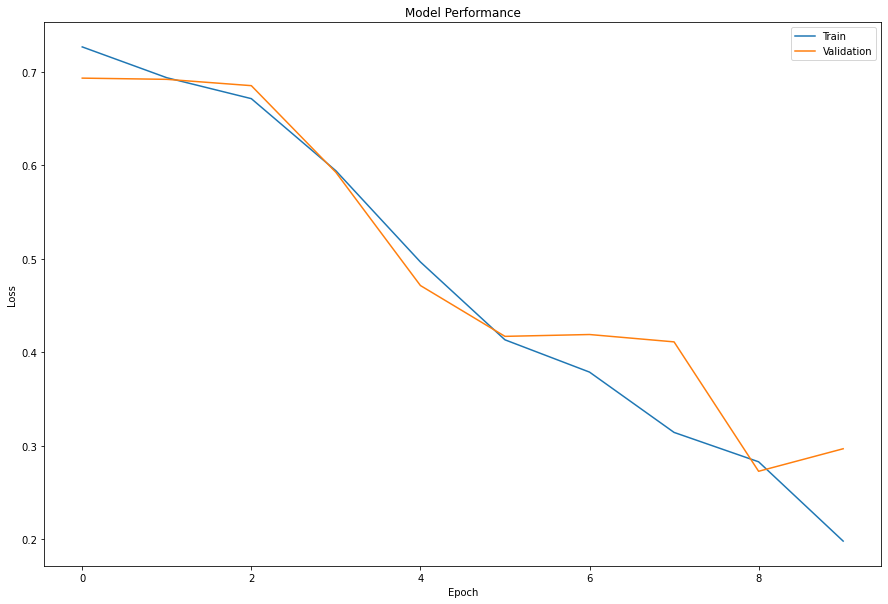

In [9]:
import matplotlib.pyplot as plt
#Loss Visualization for data training and validation

plt.figure(figsize=(15,10))
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

In [10]:
model = tf.keras.models.load_model("CNNP2.model")

# Data Latih

In [11]:
prediction = model.predict(Xtrain2)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.8689516

In [12]:
m = tf.keras.metrics.Precision()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.82808715

In [13]:
m = tf.keras.metrics.Recall()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.9280868

In [14]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

53.0

In [15]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

142.0

In [16]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

609.0

In [17]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

684.0

# Data Validasi

In [18]:
prediction = model.predict(Xval)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.71382636

In [19]:
m = tf.keras.metrics.Precision()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.6666667

In [20]:
m = tf.keras.metrics.Recall()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.84415585

In [21]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

48.0

In [22]:
m = tf.keras.metrics.FalsePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

130.0

In [23]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

184.0

In [24]:
m = tf.keras.metrics.TruePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

260.0

# Data Uji

In [25]:
prediction = model.predict(Xtest)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.5579515

In [26]:
m = tf.keras.metrics.Precision()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.53496504

In [27]:
m = tf.keras.metrics.Recall()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.83152175

In [28]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

31.0

In [29]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

133.0

In [30]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

54.0

In [31]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

153.0